In [60]:
## In this Notebook 
# analysis types of customers and help to increse sales
# clean it ,build model and predict types of customer

In [61]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"d:\New folder\data science-project\New folder\customer_shopping_data.csv")
print(df.head())
# - here see first 5rows of each columns


  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  


In [62]:
print(df.info())
# - see types of columns and their information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


In [63]:
print(df.describe(include='all'))
# - each columns proper discription


       invoice_no customer_id  gender           age  category      quantity  \
count       99457       99457   99457  99457.000000     99457  99457.000000   
unique      99457       99457       2           NaN         8           NaN   
top       I138884     C241288  Female           NaN  Clothing           NaN   
freq            1           1   59482           NaN     34487           NaN   
mean          NaN         NaN     NaN     43.427089       NaN      3.003429   
std           NaN         NaN     NaN     14.990054       NaN      1.413025   
min           NaN         NaN     NaN     18.000000       NaN      1.000000   
25%           NaN         NaN     NaN     30.000000       NaN      2.000000   
50%           NaN         NaN     NaN     43.000000       NaN      3.000000   
75%           NaN         NaN     NaN     56.000000       NaN      4.000000   
max           NaN         NaN     NaN     69.000000       NaN      5.000000   

               price payment_method invoice_date   

In [64]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [65]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


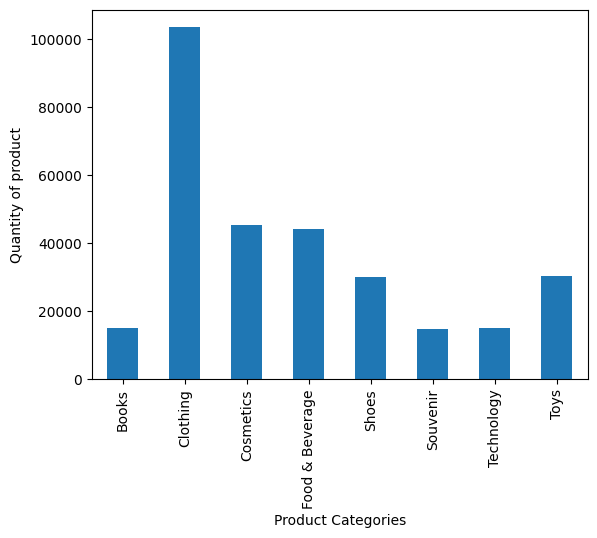

In [66]:
df.groupby("category")["quantity"].sum().plot(kind="bar")
plt.xlabel("Product Categories")
plt.ylabel("Quantity of product")
plt.show()

The highest selling item is clothes
then most selling item is costmetics & Food Beverage
in least selling item included books,technology,souvenir

gender
Female    59482
Male      39975
Name: count, dtype: int64


category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,2906,20652,9070,8804,5967,3017,2981,6085
Male,2075,13835,6027,5972,4067,1982,2015,4002


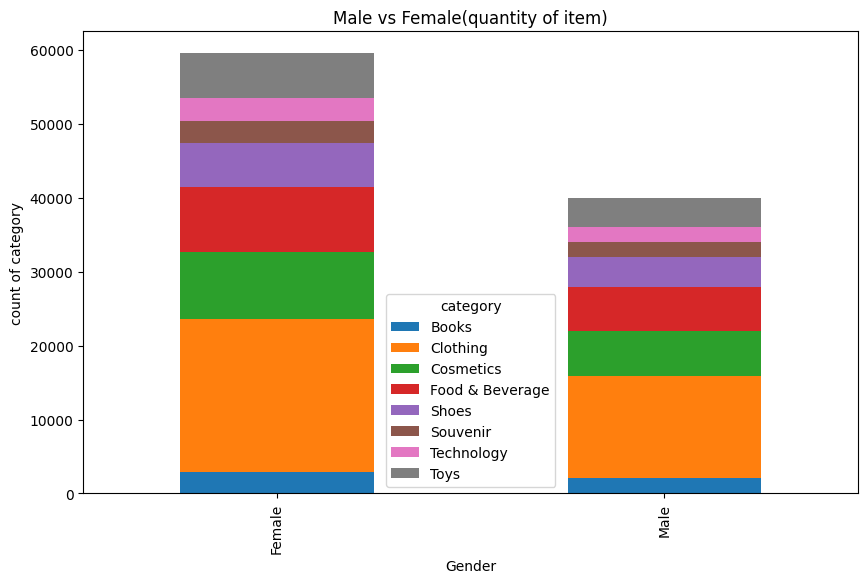

In [67]:
df.groupby(["gender","category"])["customer_id"].count().unstack().plot(kind="bar",stacked=True,figsize=(10,6))
plt.xlabel("Gender")
plt.ylabel("count of category")
plt.title("Male vs Female(quantity of item)")
print(df["gender"].value_counts())
df.groupby(["gender","category"])["customer_id"].count().unstack()

Females do more shopping then males or thats too in every category
still we see that males are less in number yet they buy approximately equal number of books,technology,shoes,toys
overall
men & women  both spend most of their money on clothes , cosmetics,  Food & Beverage,Toys,
but in category of books ,toys and technology men are more intrested than women


<Axes: xlabel='age', ylabel='Count'>

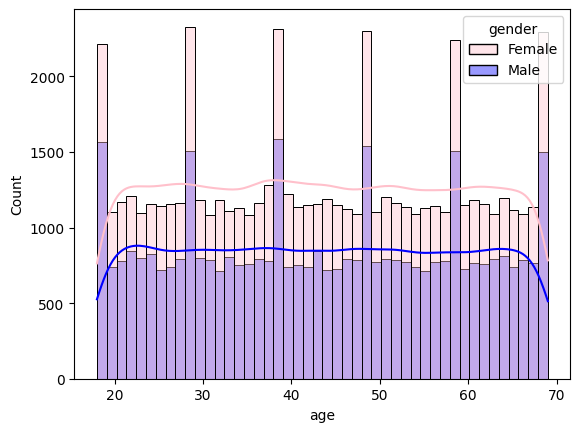

In [68]:
sns.histplot(data=df,x="age",hue="gender",kde=True,palette={"Male":"blue","Female":"pink"},alpha=0.4)

the graph show that while coustmer count is distributed fairly broadly across the ages 20 to 70 the 
coustomer base is heavily skewed towards feamales in every age category 

Text(0, 0.5, 'Average price')

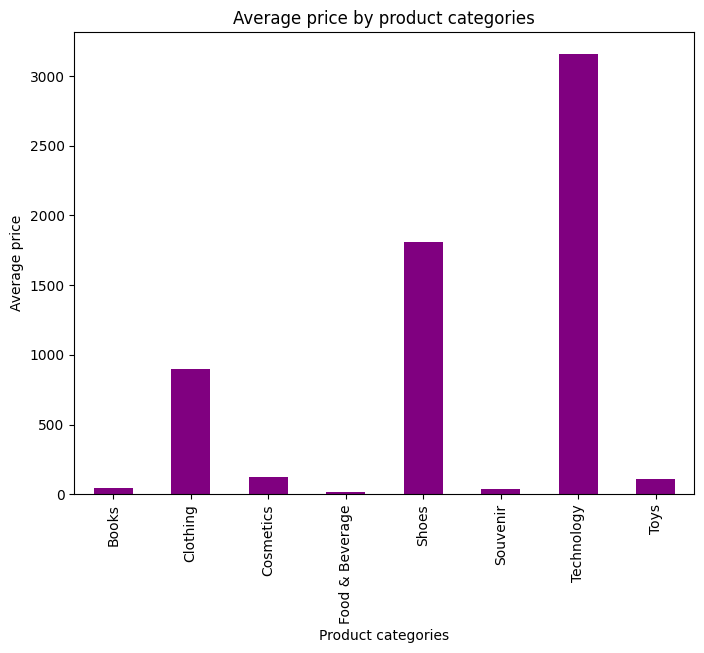

In [69]:
plt.figure(figsize=(8,6))
df.groupby("category")["price"].mean().plot(kind="bar",color="purple",title="Average price by product categories")
plt.xlabel("Product categories")
plt.ylabel("Average price")

the graph show that most expansive catagory is Technology then shoes or then clothsand 
the average price of other category is even less then 500 rs

Text(0, 0.5, 'Total sales per amount per month')

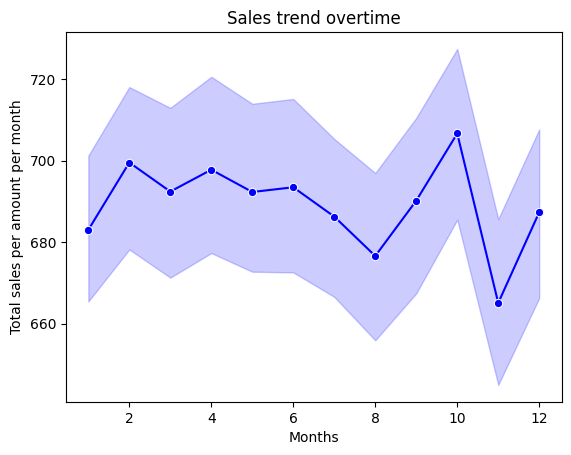

In [70]:
df["invoice_date"]= pd.to_datetime(df["invoice_date"],format="mixed")
df["year"]= df["invoice_date"].dt.year
df["Month"]=df["invoice_date"].dt.month
sns.lineplot(x=df["Month"],y=df["price"],marker="o",color="b",)
plt.title("Sales trend overtime")
plt.xlabel("Months")
plt.ylabel("Total sales per amount per month")

if we calculate the average price month by month ,we can seen how sales move over time  this show
the sales trend - 
in this graph show that 
from month1 to 6 ,sales are almost stable
then 6 to 8 months keep going down
after that  8 to 10 months  sales rise continuously  
10th month has highest sales 
in the  11 month's sale drop again
then finally in the 12 th month , sales become stable 

   year       price
0  2021  935.364446
1  2022  945.084970
2  2023  951.242694


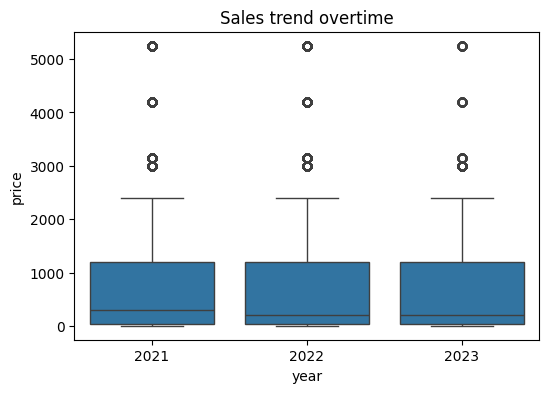

In [71]:
plt.figure(figsize=(6,4))
yearly_sales= df.groupby("year")["price"].std().reset_index()
sns.boxplot(data=df,x='year',y='price')
#plt.xticks(yearly_sales['year'])
plt.title("Sales trend overtime")
print(yearly_sales)

Across 2021-2022-2023 ,all average sales and the various  remained nearly constant .
this indicated a stable trend with no significant gain or loss in customer spending